1 Implementing all the optimizers commonly used in deep learning 
Optimizers: ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta”, ‘Nadam'] 

-> Stochastic Gradient Descent (SGD) 

-> Adam 

-> RMSprop 

-> Adagrad 

-> Adadelta 

-> Nadam 


c:\Users\Ziven\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with SGD...
Training with Adam...
Training with RMSprop...
Training with Adagrad...
Training with Adadelta...
Training with Nadam...


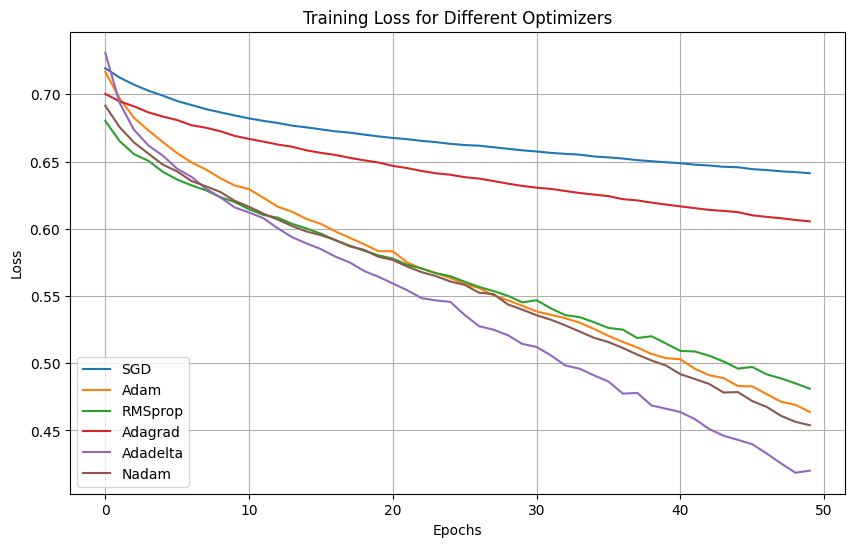

In [13]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam 

# Generate some random data for training 
X = np.random.randn(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, size=(100, 1))  # 100 labels for binary classification 

# Define a function to create a simple model 
def create_model(optimizer): 
    model = Sequential() 
    model.add(Dense(64, input_dim=5, activation='relu')) 
    model.add(Dense(32, activation='relu')) 
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) 
    return model 

# List of optimizers to try 
optimizers = [ 
    SGD(learning_rate=0.01), 
    Adam(learning_rate=0.001),
    RMSprop(learning_rate=0.001),
    Adagrad(learning_rate=0.01),
    Adadelta(learning_rate=1.0), 
    Nadam(learning_rate=0.001)
]

# List to store the training loss for each optimizer
optimizer_name =['SGD','Adam','RMSprop','Adagrad','Adadelta','Nadam']
history_dict = {}

# Loop through each optimizer and train model
for optimizer in optimizers:
    model = create_model(optimizer)
    print(f"Training with {optimizer.__class__.__name__}...")
    
    # Train the model and store the history
    history = model.fit(X, y, epochs=50,batch_size=10, verbose=0)  # Silent training
    
    # Store the loss history for plotting
    history_dict[optimizer.__class__.__name__] = history.history['loss']

# Plotting the loss for each optimizer
plt.figure(figsize=(10, 6))
for optimizer, loss in history_dict.items():
    plt.plot(loss, label=optimizer)
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1 Example 2

c:\Users\Ziven\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


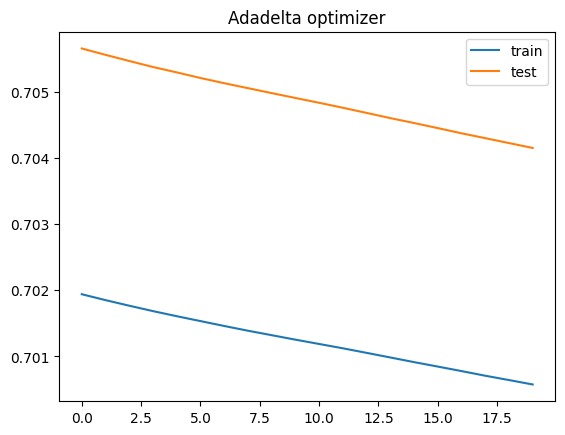


Train Loss                 Train Accuracy: [0.700539231300354, 0.4952000081539154]
Test Loss                  Test Accuracy: [0.7041550874710083, 0.5012000203132629]



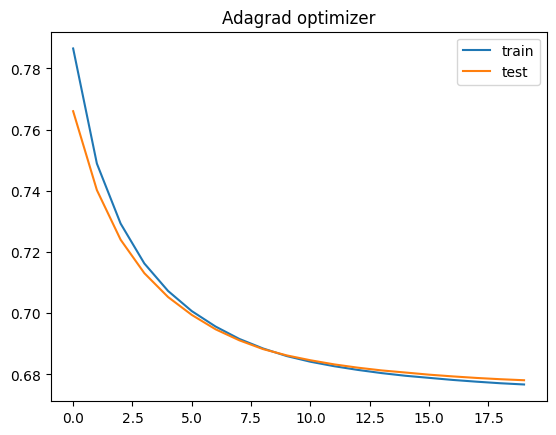


Train Loss                 Train Accuracy: [0.6764671206474304, 0.5044000148773193]
Test Loss                  Test Accuracy: [0.6780844926834106, 0.49559998512268066]



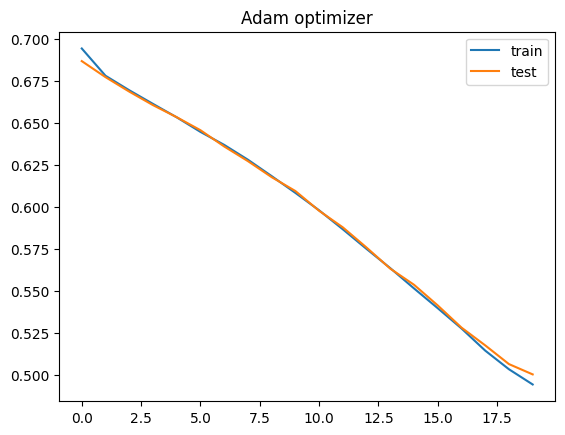


Train Loss                 Train Accuracy: [0.48739293217658997, 0.8384000062942505]
Test Loss                  Test Accuracy: [0.5002280473709106, 0.8299999833106995]



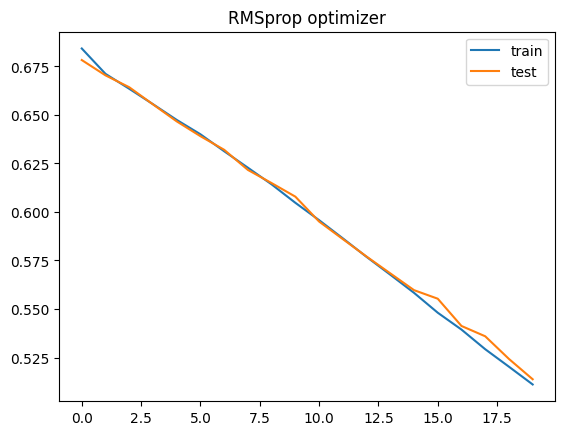


Train Loss                 Train Accuracy: [0.5047587156295776, 0.8303999900817871]
Test Loss                  Test Accuracy: [0.5138231515884399, 0.8208000063896179]



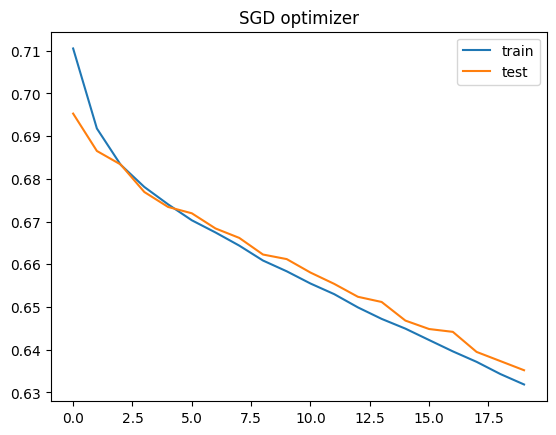


Train Loss                 Train Accuracy: [0.629811704158783, 0.6723999977111816]
Test Loss                  Test Accuracy: [0.6351929306983948, 0.6611999869346619]



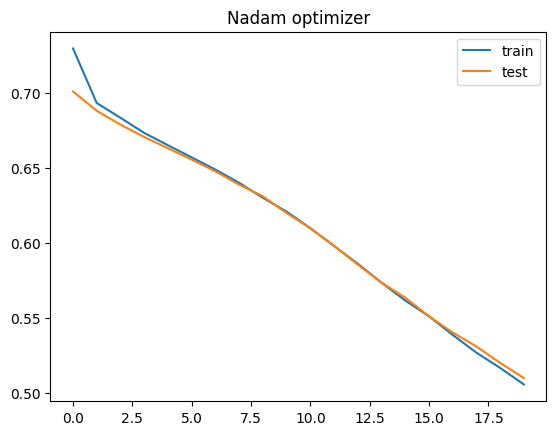


Train Loss                 Train Accuracy: [0.5008188486099243, 0.8452000021934509]
Test Loss                  Test Accuracy: [0.510079562664032, 0.8352000117301941]



In [21]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense  # Corrected from 'Dence' to 'Dense'
from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD, Nadam
from matplotlib import pyplot as plt  # Corrected 'form' to 'from' and imported pyplot as plt

# Generate 2D classification dataset
X, y = make_circles(n_samples=5000, noise=0.1, random_state=1)

# Split into train and test
train1 = 2500
trainX, testX = X[:train1, :], X[train1:]  # Corrected slicing
trainy, testy = y[:train1], y[train1:]  # Corrected variable name from 'test' to 'testy'

def build_model(optimizer):
    # Define model
    model = Sequential()
    model.add(Dense(64, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # Fixed missing comma
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

optimizers = [Adadelta(), Adagrad(), Adam(), RMSprop(), SGD(), Nadam()]  # Fixed the optimizer list

for i, optimizer in enumerate(optimizers):  # Use enumerate to loop through optimizers
    model = build_model(optimizer)
    # Fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=20, verbose=0)  # Fixed 'epochas' to 'epochs'
    
    # Evaluate the model
    train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_acc = model.evaluate(testX, testy, verbose=0)

    # Plot loss during training
    plt.title(f'{optimizer.__class__.__name__} optimizer')  # Use class name for title
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    print()
    print("Train Loss                 Train Accuracy:", train_acc)
    print("Test Loss                  Test Accuracy:", test_acc)
    print()